In [2]:
import numpy as np
from scipy import stats
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = [12., 8.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

cmap = "tab10_r"
colors = plt.get_cmap(cmap)

In [5]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance
    source: https://jakevdp.github.io
    """
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

# Clusterin Basics

## Generating some artificial test data in 2d
We sample from 3 multivariate gaussian distributions with known mean $\mu$ and covariance $\Sigma$

In [6]:
true_means = np.array([
              [1,1],
              [3,3],
              [3,0],
             ])

true_covs = np.array([
             [[1, 0],   [0, 1]],
             [[0.2, 0.1],   [0.1, 0.2]],
             [[0.8, 0], [0, 0.2]],
            ])

Generate random variates (N each)

In [25]:
N = 300

rvss = []
for i in range(len(true_means)):
    rvss.append(stats.multivariate_normal(true_means[i], true_covs[i]).rvs(N))

In [26]:
y = np.arange(3).repeat(N)

Visualizing our samples in a scattering plot. Since we know the truth, we can colorize the samples in different colors

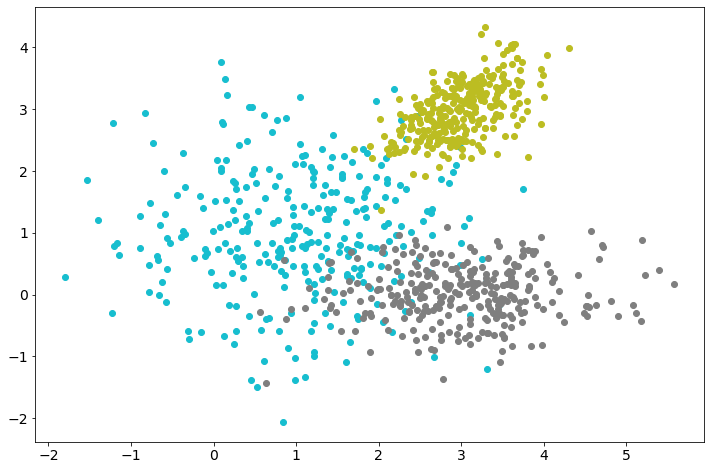

In [27]:
for i in range(len(rvss)):
    plt.scatter(rvss[i][:,0], rvss[i][:,1], color=colors(i))

For clustering (unsupervised ML), we do not know which distribution each sample was drawn from
So let's concatenate those into a single vector

Our dataset to perform the clustering on now is $X$

In [28]:
X = np.concatenate(rvss)

So now we cannot assume that we know true labels anymore

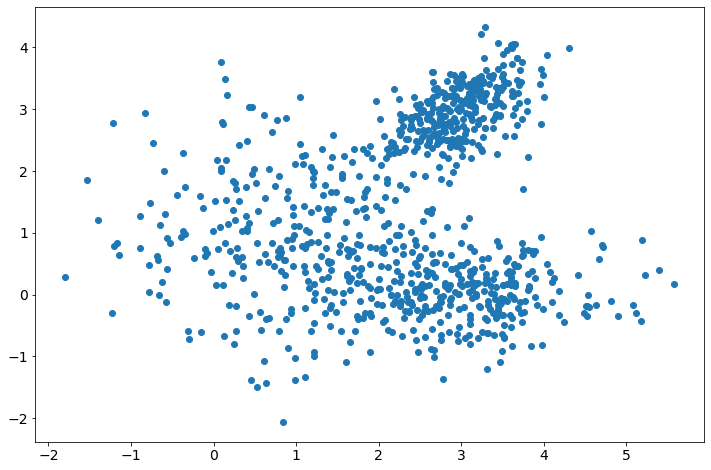

In [29]:
plt.scatter(X[:,0], X[:,1])

## K-means

our first algorithm will be the standard k-means (Lloyd)

In [30]:
# the task here will be to implement this missing function
# Looking something like:
# def kmeans(X, n):
#     ...magic code...
#     return centroids, labels

# This is my (hidden) solution
from my_mystery_module import kmeans

In [31]:
centroids, labels = kmeans(X, 3)

(-2.061806813816492, 4.329702313403402)

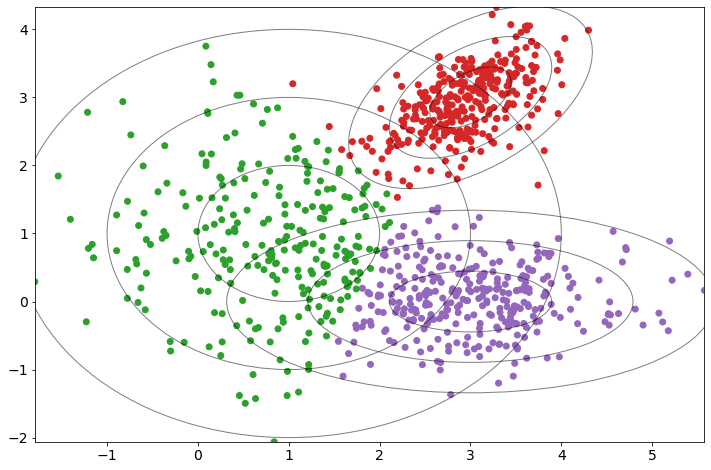

In [32]:
plt.scatter(X[:,0], X[:,1], color=colors(labels + 5))
for i in range(len(true_means)):
    draw_ellipse(np.array(true_means[i]), np.array(true_covs[i]), alpha=0.5, edgecolor='k', facecolor='none', lw=1)
    
plt.gca().set_xlim(np.min(X[:,0]), np.max(X[:,0]))
plt.gca().set_ylim(np.min(X[:,1]), np.max(X[:,1]))

(-2.061806813816492, 4.329702313403402)

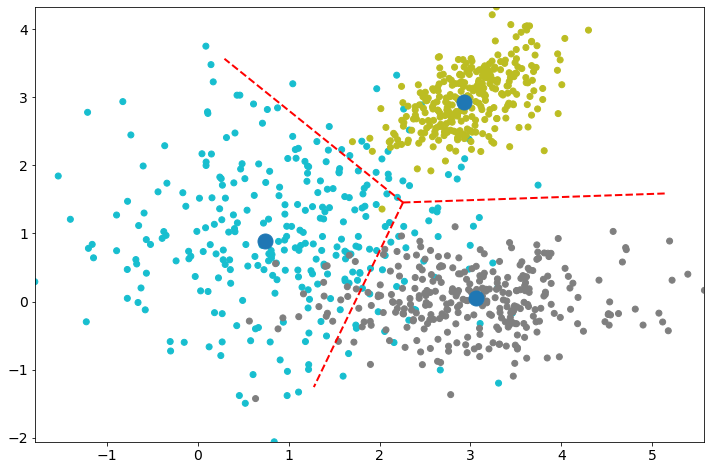

In [33]:
plt.scatter(X[:,0], X[:,1], color=colors(y))
    
vor = Voronoi(centroids,)
voronoi_plot_2d(vor, ax=plt.gca(), line_colors='red', show_vertices=False, show_points=True, point_size=30, line_width=2);

plt.gca().set_xlim(np.min(X[:,0]), np.max(X[:,0]))
plt.gca().set_ylim(np.min(X[:,1]), np.max(X[:,1]))

Step-by-step k-means

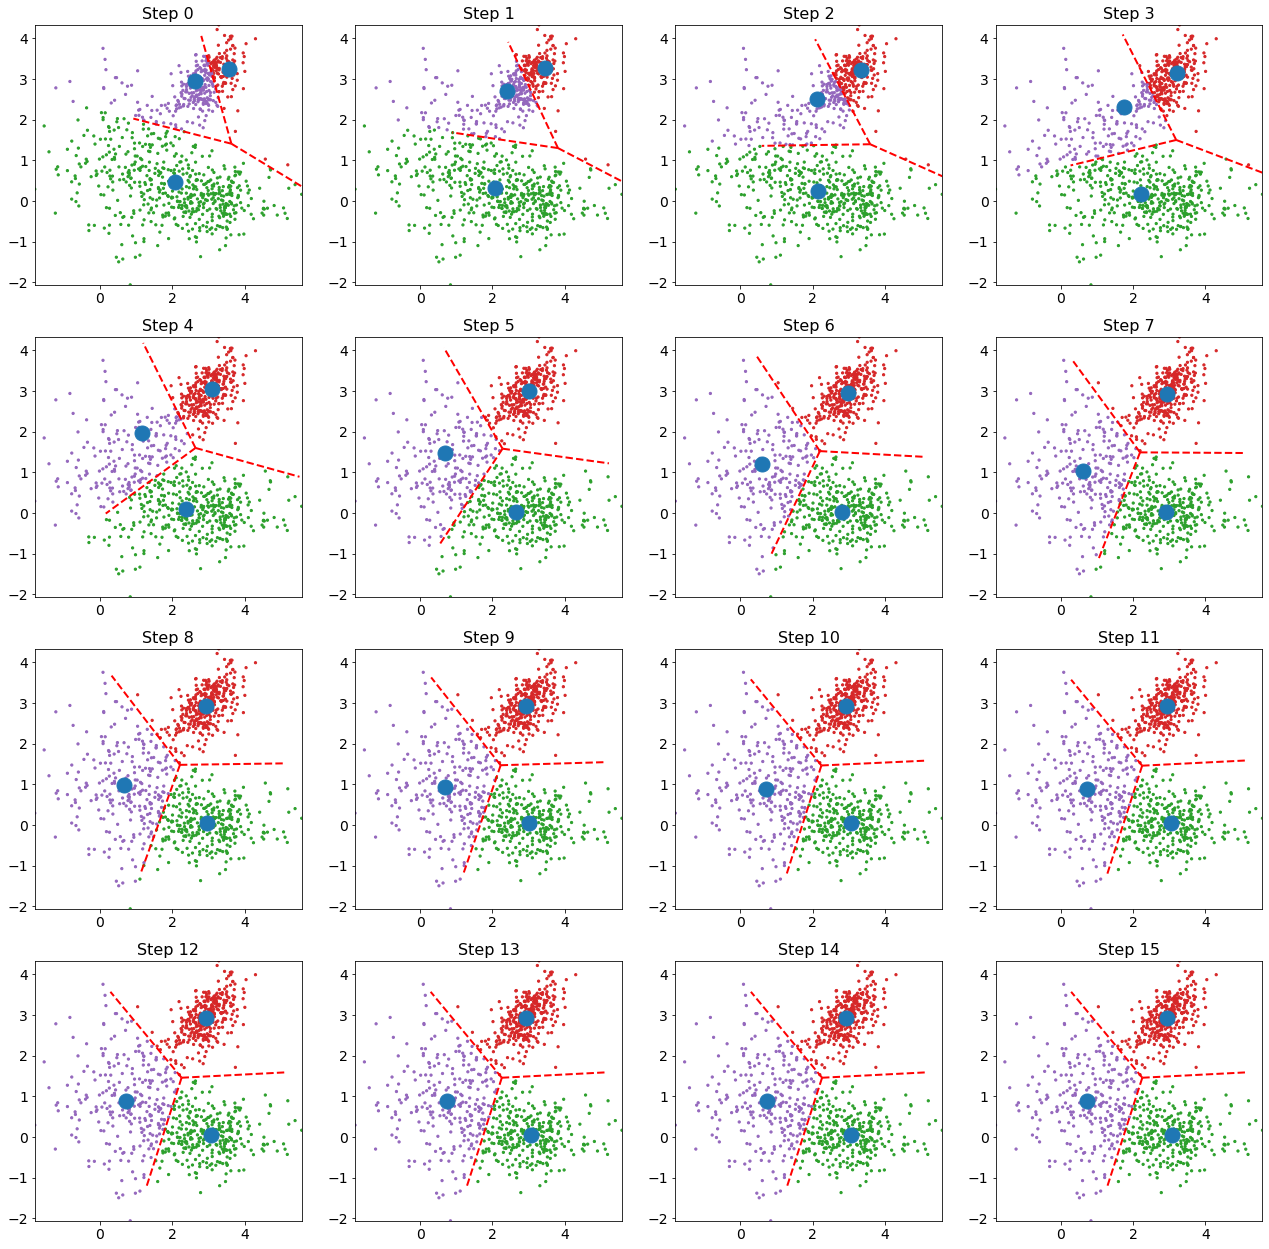

In [34]:
n_panels = 4

fig, ax = plt.subplots(n_panels,n_panels, figsize=(22,22))

centroids, labels = kmeans(X, 3, n_iter=1)

for i in range(n_panels**2):
    axis = ax[i//n_panels, i%n_panels]
    axis.scatter(X[:,0], X[:,1], color=colors(labels + 5), s=5)
    voronoi_plot_2d(Voronoi(centroids), ax=axis, line_colors='red', show_vertices=False, show_points=True, point_size=30, line_width=2);
    centroids, labels = kmeans(X, 3, centroids=centroids, n_iter=1)
    axis.set_title(f'Step {i}')
    
    axis.set_xlim(np.min(X[:,0]), np.max(X[:,0]))
    axis.set_ylim(np.min(X[:,1]), np.max(X[:,1]))

## Gaussian Mixture Model (GMM)

In [35]:
from my_mystery_module import gmm
# Here again, implement such a function

In [36]:
mus, covs, exps = gmm(X, 3)

In [37]:
# Or compare with the sklearn implementation
from sklearn.mixture import GaussianMixture
m = GaussianMixture(3)
m.fit(X)
mus, covs = m.means_, m.covariances_

In [38]:
covs

array([[[ 0.95550149, -0.03253772],
        [-0.03253772,  1.04518578]],

       [[ 0.21538603,  0.12662394],
        [ 0.12662394,  0.22655207]],

       [[ 0.73617328, -0.00441299],
        [-0.00441299,  0.21967589]]])

In [39]:
true_covs

array([[[1. , 0. ],
        [0. , 1. ]],

       [[0.2, 0.1],
        [0.1, 0.2]],

       [[0.8, 0. ],
        [0. , 0.2]]])

Text(0.5, 1.0, 'True')

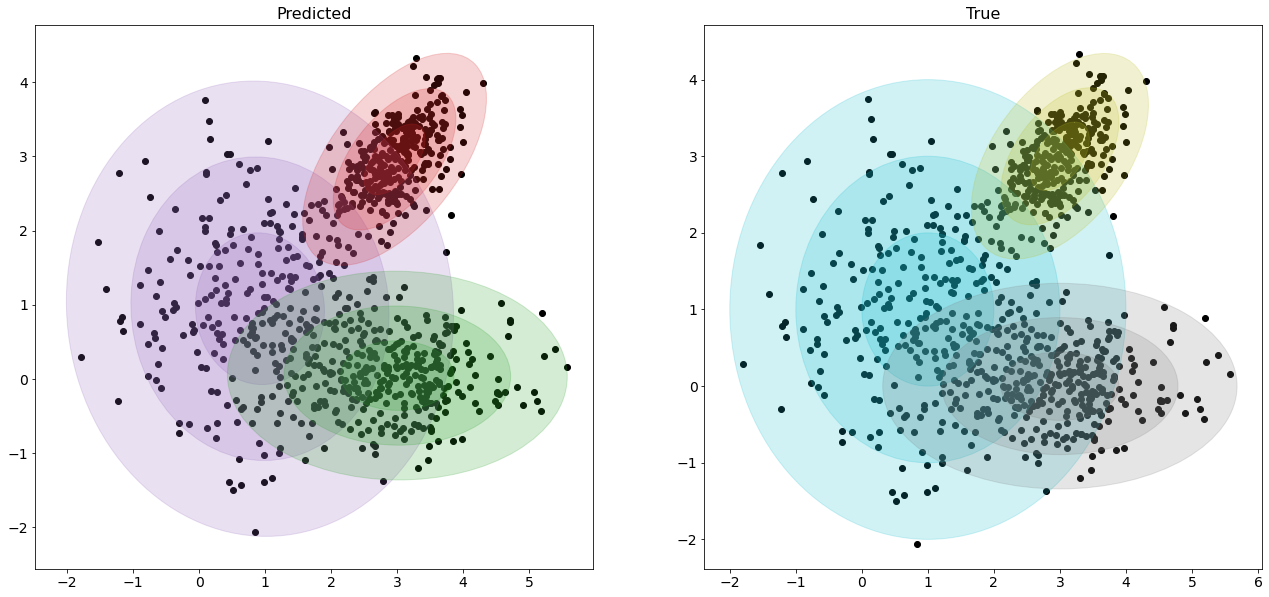

In [40]:
fig, ax = plt.subplots(1,2, figsize=(22,10))

ax[0].scatter(X[:,0], X[:,1], color='k')

for i in range(len(mus)):
    draw_ellipse(mus[i], covs[i], alpha=0.2, color=colors(i+5), ax=ax[0])
    
ax[1].scatter(X[:,0], X[:,1], color='k')

for i in range(len(mus)):
    draw_ellipse(np.array(true_means[i]), np.array(true_covs[i]), alpha=0.2, color=colors(i), ax=ax[1])
    
ax[0].set_title('Predicted')
ax[1].set_title('True')


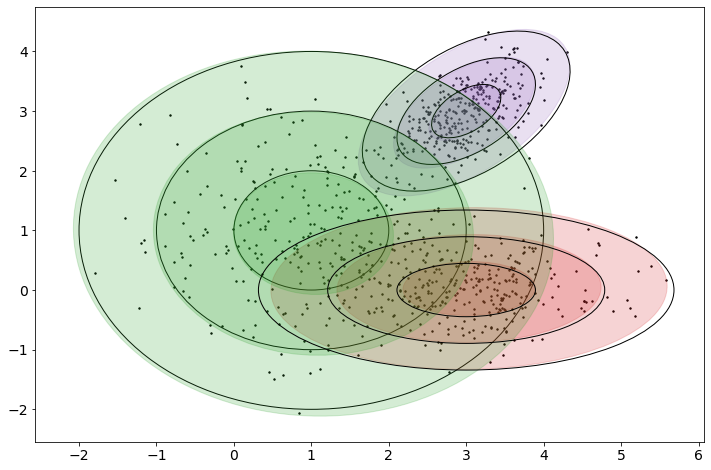

In [43]:
plt.scatter(X[:,0], X[:,1], color='k', s=2)

for i in range(len(mus)):
    draw_ellipse(mus[i], covs[i], alpha=0.2, color=colors(i+5))
    draw_ellipse(np.array(true_means[i]), np.array(true_covs[i]), alpha=1, edgecolor='k', facecolor='none', lw=1)

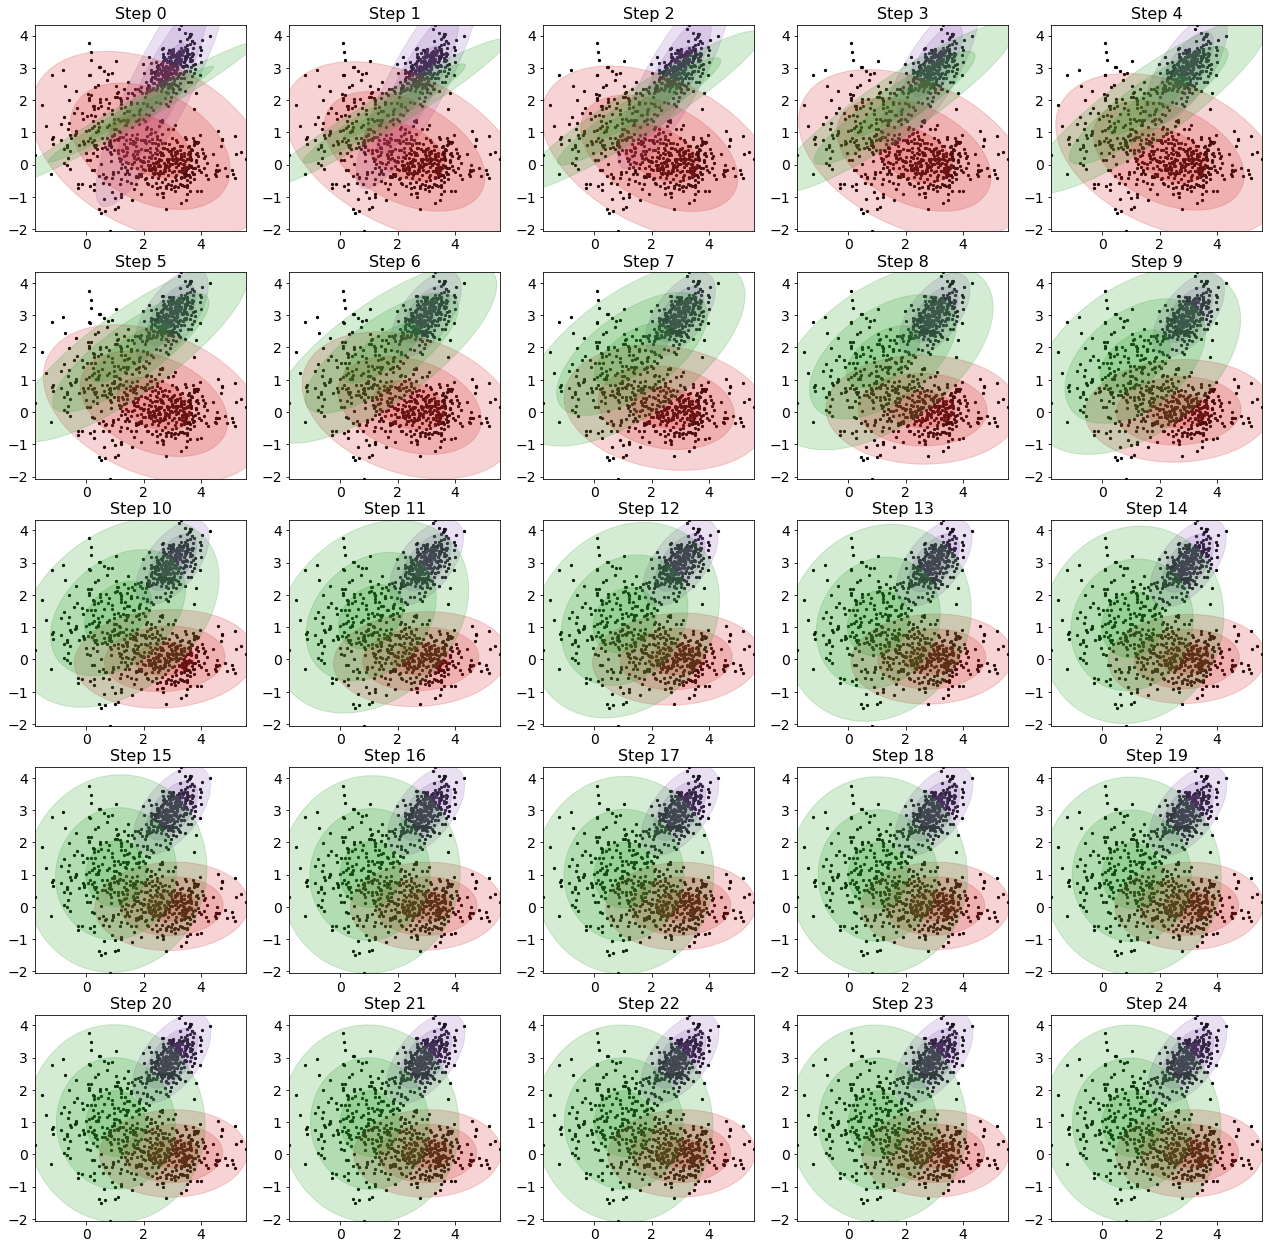

In [42]:
n_panels = 5

fig, ax = plt.subplots(n_panels, n_panels, figsize=(22,22))

mus, covs, exps = gmm(X, 3, n_iter=0)

for i in range(n_panels**2):
    axis = ax[i//n_panels, i%n_panels]
    mus, covs, exps = gmm(X, 3, mus=mus, covs=covs, n_iter=1)
    axis.set_title(f'Step {i}')
    
    for i in range(len(mus)):
        draw_ellipse(mus[i], covs[i], alpha=0.2, color=colors(i+5), ax=axis)

    axis.scatter(X[:,0], X[:,1], color='k', s=5)

        
    axis.set_xlim(np.min(X[:,0]), np.max(X[:,0]))
    axis.set_ylim(np.min(X[:,1]), np.max(X[:,1]))

We can always transform this into a "hard" clustering, by assigning the a point to the gaussian yielding the largest probability

In [26]:
gmm_labels = np.argmax(exps, axis=1)

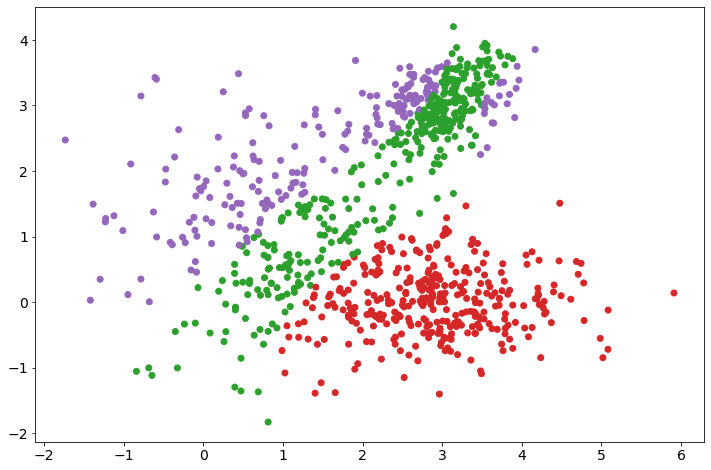

In [27]:
plt.scatter(X[:,0], X[:,1], c=colors(gmm_labels+5))